In [1]:
#libraries needed in the assignment 
import pandas as pd
import glob 
import matplotlib.pyplot as plt

In [110]:
#First step: Clean the data and find some stocks with good performance

filenames = glob.glob('Stocks' + '/*.txt') #read all the file stocks
performance_df = pd.DataFrame(columns = ['Stock', 'Start date' , 'End date' , 'Days traded', 'Metric1','Metric2', 'Metric3', 'Initial Price'], )
index = 0
valuable_stocks = [] #create list for the stocks and dataframes

for filename in filenames:
    try:
        
        df = pd.read_csv(filename) #the file of the stock
        stock = filename.split('\\')[-1].split('.')[0].upper() #name of the stock in capital letters
        df = df.drop(['OpenInt'], axis=1) #drop the column OpenInt as it is not needed
        
        #delete rows that have negative or zero values
        df= df[(df['Open'] > 0) & (df['High'] > 0) & (df['Low'] > 0) & (df['Close'] > 0) & (df['Volume'] > 0)]

        #outlier detetction: delete rows where the low value is 100% smaller than the Open and Close Value
        df = df[~(df['Low']<df['Open']*0.5)&~(df['Low']<df['Close']*0.5)] 

        #outlier detetction: delete rows where the high value is 100% greater than the Open and Close Value
        df = df[~(df['High']>df['Open']*2)&~(df['High']>df['Close']*2)]
        
        df['Stock name'] = stock #add the column stock name to the dataframe - we need it later 

        #construct the perfomrance dataframe for each stock
        performance_df.loc[index, 'Stock'] = stock
        performance_df.loc[index, 'Start date'] = df['Date'].min()
        performance_df.loc[index, 'End date'] = df['Date'].max()
        performance_df.loc[index, 'Days traded'] = len(df['Date'])
        performance_df.loc[index, 'Metric1'] = round(((df['High']-df['Low'])*df['Volume']).mean(),1)
        performance_df.loc[index, 'Metric2'] = round(((df['High']-df['Open'])*df['Volume']).mean(),1)
        performance_df.loc[index, 'Metric3'] = round(((df['Close']-df['Low'])*df['Volume']).mean(),1)
        performance_df.loc[index, 'Initial Price'] = df['Open'][0]
        
        valuable_stocks.append((stock,df)) #append the name of the stock and its dataframe
        
        index+=1 #increase the index for the next stock
        
    except:  #some stock files are completely empty
        pass
    
performance_df[:10]

,Stock,Start date,End date,Days traded,Metric1,Metric2,Metric3,Initial Price
0,A,1999-11-18,2017-11-10,4520,3730970.8,1875837.7,1883614.3,30.713
1,AA,1970-01-02,2017-11-10,12073,3633362.7,1680053.7,1810950.8,2.2972
2,AAAP,2015-11-11,2017-11-10,505,290939.4,174029.7,169404.6,18.5
3,AABA,1996-04-12,2017-11-10,5433,29140437.3,14431409.6,14765802.4,1.05
4,AAC,2014-10-02,2017-11-10,784,349121.1,174268.0,155820.4,20.0
5,AAL,2013-12-10,2017-11-10,989,13975218.6,6807172.8,7151759.1,23.698
6,AAMC,2012-12-13,2017-11-10,1210,374908.6,162174.8,183916.0,15.0
7,AAME,2005-02-25,2017-11-10,2923,1296.8,653.1,684.0,2.8973
8,AAN,2005-02-25,2017-11-10,3201,589188.9,285516.2,295136.1,12.92
9,AAOI,2013-09-26,2017-11-10,1041,2791275.2,1412712.8,1401831.4,10.0


In [131]:
#View the first 10 stocks based on performance regarding Metric1
performance_df_sorted = performance_df.sort_values('Metric1', ascending = False)
performance_df_sorted = performance_df_sorted[performance_df_sorted['Days traded'] > 100] #Days traded: at least 100 
performance_df_sorted.head(10) #view the top 10 stocks

,Stock,Start date,End date,Days traded,Metric1,Metric2,Metric3,Initial Price
2161,FB,2012-05-18,2017-11-10,1381,73785975.0,34832685.9,36655544.0,42.05
12,AAPL,1984-09-07,2017-11-10,8363,55236558.1,25126137.7,28079981.0,0.42388
2643,GOOGL,2004-08-19,2017-11-10,3332,52380793.8,24061680.4,25905027.2,50.0
573,BABA,2014-09-19,2017-11-10,794,50495340.6,23544493.2,25249411.0,92.7
854,BRK-B,1996-05-09,2017-11-10,5415,42501121.8,20781839.0,23695775.1,23.6
1573,DAL,1980-01-02,2017-11-10,9548,34737877.3,17276481.9,17002151.0,1169.22
4017,MSFT,1986-03-13,2017-11-10,7982,33361837.8,16872387.2,16752639.7,0.0672
328,AMZN,1997-05-16,2017-11-10,5152,32707900.6,16723180.5,17309251.8,1.97
1426,CSCO,1990-03-26,2017-11-10,6962,32355122.6,15880218.7,16084397.0,0.06599
6101,TWTR,2013-11-07,2017-11-10,1011,32340410.7,16176637.7,15151168.0,45.1


In [132]:
#Create a dataframe to store the first 100 stocks based on performance
top100 = performance_df_sorted[:100]
best_performance = [] #list to append each dataframe

for (stock,df) in valuable_stocks:
    if stock in top100.Stock.values:
        best_performance.append(df)

best_performance_df = pd.concat(best_performance) 
#best_performance_df['Date']= pd.to_datetime(best_performance_df['Date'])
best_performance_df = best_performance_df.sort_values('Date')
best_performance_df

,Date,Open,High,Low,Close,Volume,Stock name
0,1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,IBM
0,1962-01-02,0.6277,0.6362,0.6201,0.6201,2575579,GE
1,1962-01-03,0.6201,0.6201,0.6122,0.6201,1764749,GE
1,1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,IBM
2,1962-01-04,0.6201,0.6201,0.6037,0.6122,2194010,GE
...,...,...,...,...,...,...,...
3200,2017-11-10,40.5900,40.5900,40.0600,40.3000,3117331,BP
3200,2017-11-10,47.4700,47.6600,46.5200,47.1100,2155680,HES
9113,2017-11-10,163.3400,164.5800,162.9300,164.1100,3553230,HD
9042,2017-11-10,44.9000,45.0200,44.3900,44.5800,4564926,HAL


In [133]:
#create the column High-Open & sort values based on date and High-Open
best_performance_df['High-Open'] = best_performance_df['High'] - best_performance_df['Open']  
best_performance_df = best_performance_df.sort_values(['Date','High-Open'], ascending = [True,False])
best_performance_df

,Date,Open,High,Low,Close,Volume,Stock name,High-Open
0,1962-01-02,0.6277,0.6362,0.6201,0.6201,2575579,GE,0.0085
0,1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,IBM,0.0000
1,1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,IBM,0.0585
1,1962-01-03,0.6201,0.6201,0.6122,0.6201,1764749,GE,0.0000
2,1962-01-04,0.6201,0.6201,0.6037,0.6122,2194010,GE,0.0000
...,...,...,...,...,...,...,...,...
1696,2017-11-10,17.8600,17.9000,17.6500,17.6700,9151726,KMI,0.0400
9044,2017-11-10,66.5900,66.6200,65.1800,65.7400,6575455,SLB,0.0300
6963,2017-11-10,34.0600,34.0900,33.6700,33.9900,19314208,CSCO,0.0300
3200,2017-11-10,6.0900,6.1100,5.9700,6.0000,12509747,CLF,0.0200


In [134]:
#keep one row per day - the one with the highest 'High-Open'
best_performance_df = best_performance_df.drop_duplicates(subset=['Date'])
best_performance_df 

,Date,Open,High,Low,Close,Volume,Stock name,High-Open
0,1962-01-02,0.6277,0.6362,0.6201,0.6201,2575579,GE,0.0085
1,1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,IBM,0.0585
2,1962-01-04,0.6201,0.6201,0.6037,0.6122,2194010,GE,0.0000
3,1962-01-05,0.6122,0.6122,0.5798,0.5957,3255244,GE,0.0000
4,1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,IBM,0.0000
...,...,...,...,...,...,...,...,...
3196,2017-11-06,1885.5500,1904.9800,1875.5600,1903.0000,1011096,PCLN,19.4300
912,2017-11-07,1027.2700,1033.9600,1027.1200,1033.3300,1112146,GOOG,6.6900
3198,2017-11-08,1650.0000,1669.9800,1630.5600,1661.3300,1332372,PCLN,19.9800
3199,2017-11-09,1656.9300,1707.2200,1640.1800,1703.1400,1241185,PCLN,50.2900


In [135]:
#First algorithm
transactions = [] #list for transactions
balance = 1 #initial balance

for index, row in best_performance_df.iterrows(): #iterate through the rows
    
    indicator1 = row['High']-row['Open'] # High - Open
    indicator2 = row['Close']-row['Low'] # Close - Low
    
    if (indicator1 > indicator2): #check which difference is greater
    
        if (balance > row['Open']):
            
            result = min(int(balance//row['Open']), int(1000000//row['Open'])) 
            #result: number of stocks to buy - aditional constraint max 1m for purchasing
            transactions.append((row['Date'],'buy-open',row['Stock name'],str(result))) #add the transaction
            balance = balance - result*row['Open'] #buy open - reduce balance
            transactions.append((row['Date'],'sell-high',row['Stock name'],str(result))) #add the transaction
            balance = balance + result*row['High'] #sell high - increase balance 
     
    elif (indicator2 > indicator1): #likewise but buy low - sell close 
        
        if (balance > row['Low']): 
       
            result = min(int(balance//row['Low']), int(1000000//row['Low']))
            transactions.append((row['Date'],'buy-low',row['Stock name'],str(result)))
            balance = balance - result*row['Low'] #buy low 
            transactions.append((row['Date'],'sell-close',row['Stock name'],str(result)))
            balance = balance + result*row['Close'] #sell close  
    
    elif (indicator1 == indicator2): #likewise: we choose buy open - sell high
        
        if (row['Open'] < row['High']) and (balance > row['Open']):
       
            result = min(int(balance//row['Open']), int(1000000//row['Open']))
            transactions.append((row['Date'],'buy-open',row['Stock name'],str(result)))
            balance = balance - result*row['Open'] #buy open 
            transactions.append((row['Date'],'sell-high',row['Stock name'],str(result)))
            balance = balance + result*row['High'] #sell high  
            
print(balance) #final profits
print(len(transactions)) #number of total transactions

274127362.7420999
24374


In [117]:
#Function to save transactions in a txt file 
def save_transactions(tranasctions,filename):
    with open(filename, 'w') as f:
        f.write(str(len(transactions)) + '\n') #number of transactions
        for t in transactions: #each transaction
            f.write(' '.join(t) + '\n')
            
save_transactions(transactions,'transactions.txt')

In [99]:
df = pd.read_csv('Stocks/aapl.us.txt') #Apple's stock 
df = df.drop(['OpenInt'], axis=1) #remove column OpenInt
df['Stock name'] = 'AAPL'
df

,Date,Open,High,Low,Close,Volume,Stock name
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,AAPL
...,...,...,...,...,...,...,...
8359,2017-11-06,171.75000,174.36000,171.10000,173.63000,34901241,AAPL
8360,2017-11-07,173.29000,174.51000,173.29000,174.18000,24424877,AAPL
8361,2017-11-08,174.03000,175.61000,173.71000,175.61000,24451166,AAPL
8362,2017-11-09,174.48000,175.46000,172.52000,175.25000,29533086,AAPL


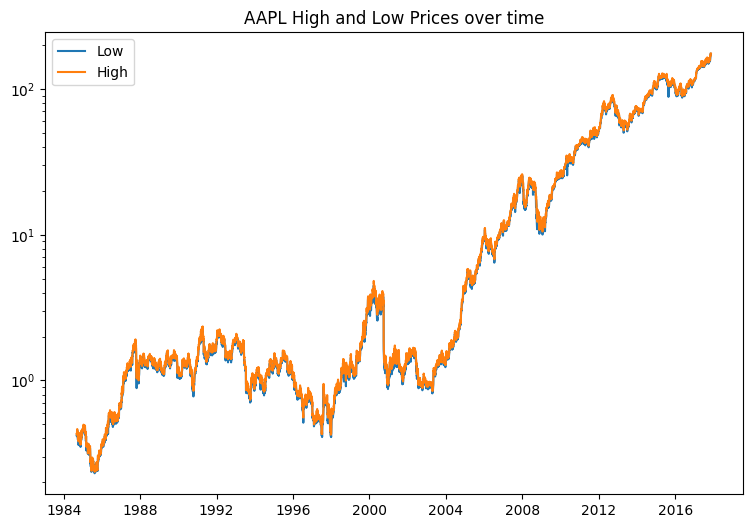

In [82]:
#Plot AAPL's Low and High values over time
fig, ax = plt.subplots()

df['Date']= pd.to_datetime(df['Date'])
ax.plot(df['Date'],df['Low'], label = 'Low') #low prices
ax.plot(df['Date'],df['High'], label = 'High') #high prices
ax.set_title('AAPL High and Low Prices over time') #title
ax.legend() #legend
ax.set_yscale('log') #change the scale of y
plt.show()

In [100]:
#large sequence < 1.000.000
transactions = [] #list for transactions
portfolio = {'AAPL': 0} #dictionary to "save" the portfolio
balance = 1 #initial balance
flag = True 
daily_balance = [] #keep the daily balance for plotting
daily_portfolio = [] #keep the daily portfolio for plotting
day = [] #keep the day for plotting

for index, row in df.iterrows(): #iterate through the rows
    
    if (index < len(df)-1): #all the rows expect the last one
        
        if (df.iloc[index]['Low'] < df.iloc[index+1]['High']) and (balance > row['Low']) and (flag == True) and (balance < 1000000):
        
            result = int(balance//row['Low']) #number of stocks to buy
            transactions.append((row['Date'],'buy-low', row['Stock name'],str(result)))
            balance = balance - result*row['Low'] #buy low
            portfolio[row['Stock name']] += result #update the portfolio
            flag = False
            daily_balance.append(balance) #balance of the day
            daily_portfolio.append(row['Close']*portfolio[row['Stock name']]) #value of unsold stocks
            day.append(row['Date']) #the day
        
        elif (df.iloc[index]['Low'] < df.iloc[index+1]['High']) and (balance > row['Low']) and (flag == True) and (balance > 1000000):
    
            result = int(1000000//row['Low']) #number of stocks to buy
            transactions.append((row['Date'],'buy-low',row['Stock name'],str(result)))
            balance = balance - result*row['Low'] #buy low
            portfolio[row['Stock name']] += result #update the portfolio
            daily_balance.append(balance) #balance of the day
            daily_portfolio.append(row['Close']*portfolio[row['Stock name']]) #value of unsold stocks
            day.append(row['Date']) #the day
    
        elif (flag == False) and (df.iloc[index+1]['High'] < df.iloc[index]['High']):
    
            result = portfolio[row['Stock name']] #number of stocks to buy
            transactions.append((row['Date'],'sell-high',row['Stock name'],str(result)))
            balance = balance + result*row['High'] #sell high
            portfolio[row['Stock name']] = 0 #set portfolio to 0 - sell all stocks
            flag = True
            daily_balance.append(balance) #balance of the day
            daily_portfolio.append(row['Close']*portfolio[row['Stock name']]) #0
            day.append(row['Date']) #the day
        
#sell the remaining stocks the last day at high price
last_profits = df.iloc[-1]['High'] * portfolio['AAPL'] #profits of the last day
transactions.append((row['Date'],'sell-high','AAPL',str(portfolio['AAPL'])))
balance += last_profits #update balance
portfolio['AAPL'] = 0 #set portfolio to 0 - all stocks sold
daily_balance.append(balance) #balance of the day
daily_portfolio.append(row['Close']*portfolio['AAPL']) #0
day.append(row['Date']) #last day

print(balance)
print(len(transactions))

save_transactions(transactions,'large.txt') #save the transactions

11217692639.847694
7681


In [29]:
#create a dataframe to plot the valuation diagram - large sequence
data = {'Date': day, 'Balance': daily_balance, 'Portfolio': daily_portfolio}
large_df = pd.DataFrame(data) 
large_df['Total Value'] = large_df['Balance'] + large_df['Portfolio'] #valuation of each day
large_df['Date']= pd.to_datetime(large_df['Date']) 
large_df.sort_values(['Date'], ascending = [True])
large_df

,Date,Balance,Portfolio,Total Value
0,1984-09-07,1.625200e-01,8.477600e-01,1.010280e+00
1,1984-09-11,1.035880e+00,0.000000e+00,1.035880e+00
2,1984-09-12,2.035200e-01,8.323600e-01,1.035880e+00
3,1984-09-17,1.130660e+00,0.000000e+00,1.130660e+00
4,1984-09-18,2.496200e-01,8.810400e-01,1.130660e+00
...,...,...,...,...
7676,2017-11-06,3.546891e+08,1.075457e+10,1.110926e+10
7677,2017-11-07,3.536892e+08,1.078964e+10,1.114333e+10
7678,2017-11-08,3.526893e+08,1.087924e+10,1.123192e+10
7679,2017-11-09,3.516894e+08,1.085795e+10,1.120964e+10


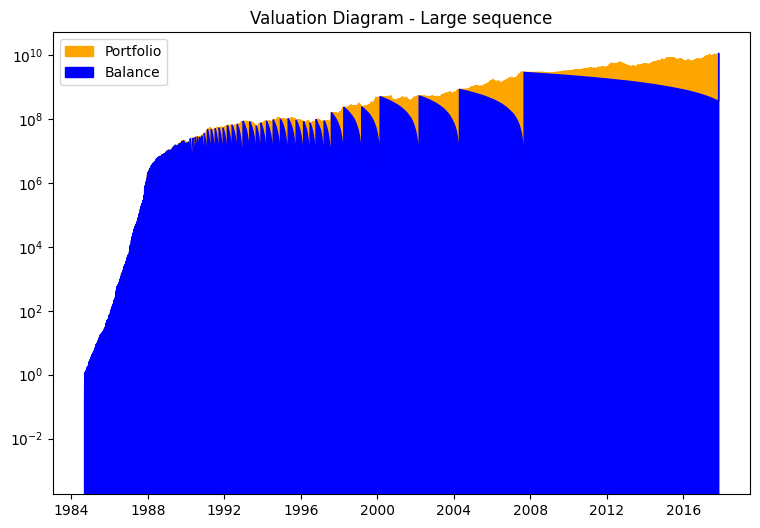

In [13]:
#Plot the valuation diagram for the large sequence
plt.rcParams["figure.figsize"] = (9,6)
plt.fill_between(large_df['Date'], large_df['Total Value'] ,label='Portfolio',color='orange')
plt.fill_between(large_df['Date'], large_df['Balance'] ,label='Balance',color='blue')
plt.title('Valuation Diagram - Large sequence') #set title
plt.yscale('log') #change the y scale
plt.legend(loc='upper left') #add legend in the upper left corner

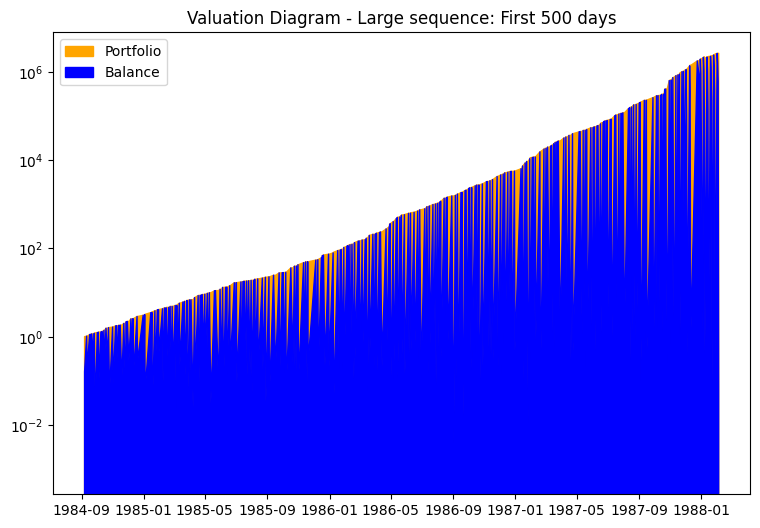

In [14]:
#Large sequence: A closer look in the first 500 days
large_df = large_df[:500]
plt.rcParams["figure.figsize"] = (9,6)
plt.fill_between(large_df['Date'], large_df['Total Value'] ,label='Portfolio',color='orange')
plt.fill_between(large_df['Date'], large_df['Balance'] ,label='Balance',color='blue')
plt.title('Valuation Diagram - Large sequence: First 500 days')
plt.yscale('log')
plt.legend(loc='upper left')

In [47]:
#small sequence <1.000
transactions = [] #list for transactions
portfolio = {'AAPL': 0} #dictionary to "save" the portfolio
balance = 1 #initial balance
flag = True 
daily_balance = [] #keep the daily balance for plotting
daily_portfolio = [] #keep the daily portfolio for plotting
day = [] #keep the day for plotting

for index, row in df.iterrows(): #iterate through the rows
    
    if (index<1430): #number selected for the transactions to be <1.000
        
        if (df.iloc[index]['Low'] < df.iloc[index+1]['High']) and (balance > row['Low']) and (flag == True) and (balance < 1000000):
        
            result = int(balance//row['Low']) #number of stocks to buy
            transactions.append((row['Date'],'buy-low', row['Stock name'],str(result)))
            balance = balance - result*row['Low'] #buy low
            portfolio[row['Stock name']] += result #update the portfolio
            flag = False
            daily_balance.append(balance) #balance of the day
            daily_portfolio.append(row['Close']*portfolio[row['Stock name']]) #value of unsold stocks
            day.append(row['Date']) #the day
        
        elif (df.iloc[index]['Low'] < df.iloc[index+1]['High']) and (balance > row['Low']) and (flag == True) and (balance > 1000000):
    
            result = int(1000000//row['Low']) #number of stocks to buy
            transactions.append((row['Date'],'buy-low',row['Stock name'],str(result)))
            balance = balance - result*row['Low'] #buy low
            portfolio[row['Stock name']] += result #update the portfolio
            daily_balance.append(balance) #balance of the day
            daily_portfolio.append(row['Close']*portfolio[row['Stock name']]) #value of unsold stocks
            day.append(row['Date']) #the day
    
        elif (flag == False) and (portfolio[row['Stock name']]>0) and (df.iloc[index+1]['High'] < df.iloc[index]['High']):
            
            result = portfolio[row['Stock name']] #number of stocks to buy
            transactions.append((row['Date'],'sell-high',row['Stock name'],str(result)))
            balance = balance + result*row['High'] #sell high
            portfolio[row['Stock name']] = 0 #set portfolio to 0 - sell all stocks
            flag = True
            daily_balance.append(balance) #balance of the day
            daily_portfolio.append(row['Close']*portfolio[row['Stock name']]) #0
            day.append(row['Date']) #the day
            
    if (index>1430) and (index < len(df)-1): #added for the plotting
            
        daily_balance.append(balance)
        daily_portfolio.append(row['Close']*portfolio[row['Stock name']])
        day.append(row['Date'])
        
#sell the remaining stocks the last day at high price
last_profits = df.iloc[-1]['High'] * portfolio['AAPL'] #profits of the last day
transactions.append((row['Date'],'sell-high','AAPL',str(portfolio['AAPL'])))
balance += last_profits #update balance
portfolio['AAPL'] = 0 #set portfolio to 0 - all stocks sold
daily_balance.append(balance) #balance of the day
daily_portfolio.append(row['Close']*portfolio['AAPL']) #0
day.append(row['Date']) #last day
        
print(balance)
print(len(transactions))

save_transactions(transactions,'small.txt')

3189478919.69392
997


In [48]:
#create a dataframe to plot the valuation diagram - small sequence
data = {'Date': day, 'Balance': daily_balance, 'Portfolio': daily_portfolio}
small_df = pd.DataFrame(data) 
small_df['Total Value'] = small_df['Balance'] + small_df['Portfolio'] #valuation of each day
small_df['Date']= pd.to_datetime(small_df['Date'])
small_df.sort_values(['Date'], ascending = [True])

,Date,Balance,Portfolio,Total Value
0,1984-09-07,1.625200e-01,8.477600e-01,1.010280e+00
1,1984-09-11,1.035880e+00,0.000000e+00,1.035880e+00
2,1984-09-12,2.035200e-01,8.323600e-01,1.035880e+00
3,1984-09-17,1.130660e+00,0.000000e+00,1.130660e+00
4,1984-09-18,2.496200e-01,8.810400e-01,1.130660e+00
...,...,...,...,...
7924,2017-11-06,1.739200e-01,3.157653e+09,3.157653e+09
7925,2017-11-07,1.739200e-01,3.167656e+09,3.167656e+09
7926,2017-11-08,1.739200e-01,3.193662e+09,3.193662e+09
7927,2017-11-09,1.739200e-01,3.187115e+09,3.187115e+09


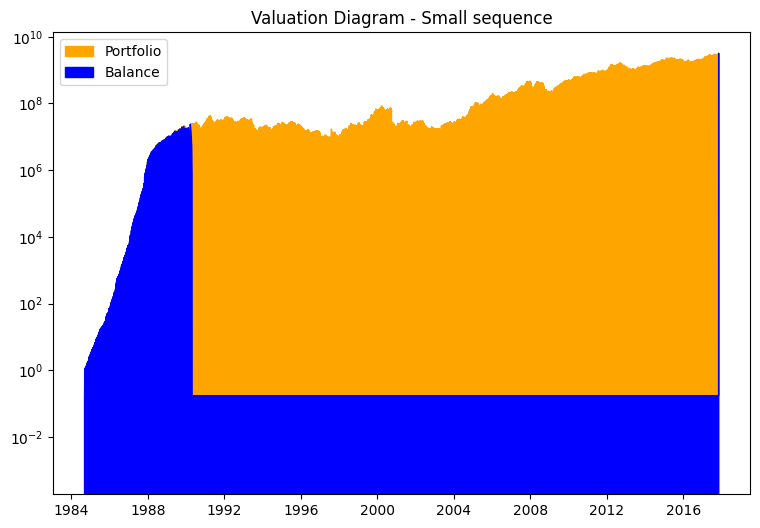

In [44]:
#For the valuation diagram we need to see how the portfolio moves during time
plt.rcParams["figure.figsize"] = (9,6)
plt.fill_between(small_df['Date'], small_df['Total Value'] ,label='Portfolio',color='orange')
plt.fill_between(small_df['Date'], small_df['Balance'] ,label='Balance',color='blue')
plt.title('Valuation Diagram - Small sequence')
plt.yscale('log')
plt.legend(loc='upper left')

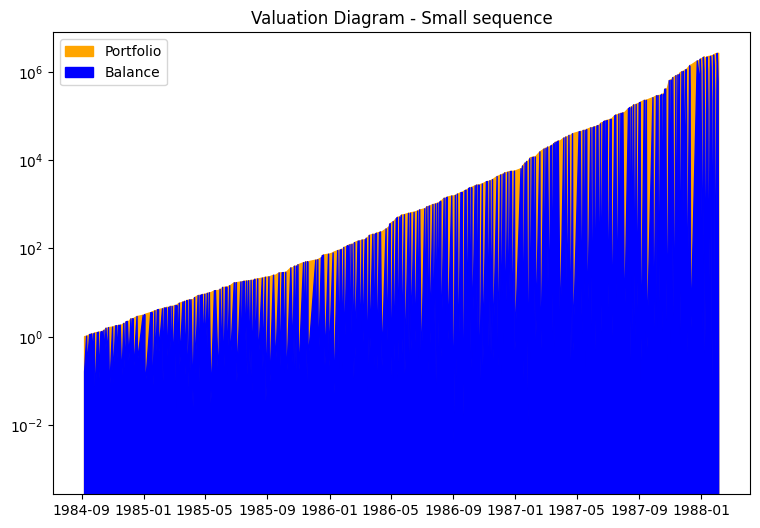

In [46]:
#same for the first 500 days
small_df = small_df[:500]
plt.rcParams["figure.figsize"] = (9,6)
plt.fill_between(small_df['Date'], small_df['Total Value'] ,label='Portfolio',color='orange')
plt.fill_between(small_df['Date'], small_df['Balance'] ,label='Balance',color='blue')
plt.title('Valuation Diagram - Small sequence')
plt.yscale('log')
plt.legend(loc='upper left')

In [51]:
#Additional material

In [49]:
#Function to save a dataframe in order to inspect it
def save_dataframe(dataframe,filename):
    df = dataframe.to_csv(index = False)
    
    with open(filename,'w') as f:
        f.write(df)
        
save_dataframe(df,'test.txt')

In [50]:
#View the last 10 stocks based on performance regarding Metric1
performance_df_sorted = performance_df.sort_values('Metric1', ascending = True)
performance_df_sorted.head(10)

,Stock,Start date,End date,Days traded,Metric1,Metric2,Metric3,Initial Price
3251,IVFVC,2016-12-02,2017-09-27,50,0.0,0.0,0.0,99.54
2340,FOANC,2017-02-15,2017-10-20,13,0.0,0.0,0.0,100.01
6600,XGTIW,2017-04-04,2017-10-06,10,0.0,0.0,0.0,5.0501
3959,MOGLC,2017-04-20,2017-10-04,18,0.0,0.0,0.0,100.06
3249,IVENC,2016-12-02,2017-09-27,51,0.0,0.0,0.0,100.01
3250,IVFGC,2016-12-02,2017-09-27,51,0.1,0.0,0.0,99.97
3911,MLPB,2017-08-14,2017-11-03,11,1.1,0.0,0.0,24.636
6210,USHY,2017-11-01,2017-11-09,7,1.2,0.0,0.4,50.18
2085,EURZ,2015-08-19,2017-11-08,41,1.9,0.0,0.0,24.75
3083,IGEM,2017-09-14,2017-10-19,4,2.0,0.0,0.0,24.861


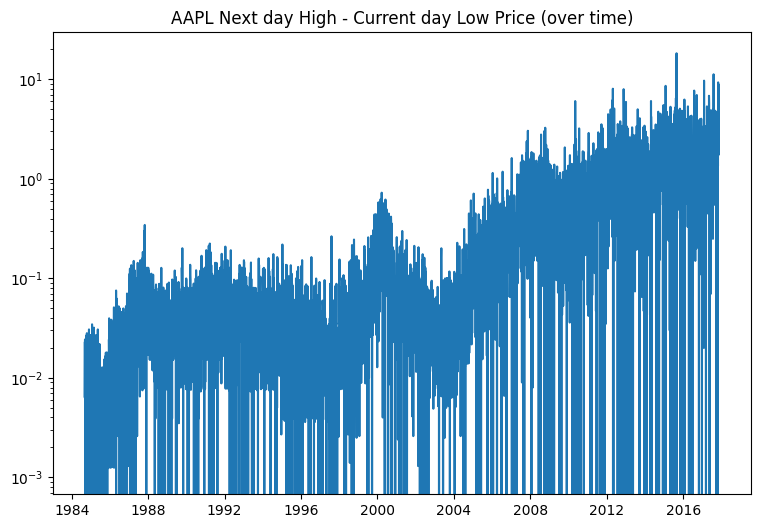

In [90]:
#Plot AAPL's Next day high - Low price
df = pd.read_csv('Stocks/aapl.us.txt')
df = df.drop(['OpenInt'], axis=1)
df['Next day High'] = df['High'].shift(-1) #add a column with the next day high

fig, ax = plt.subplots()

df['Date']= pd.to_datetime(df['Date'])
ax.plot(df['Date'],df['Next day High']-df['Low'], label = 'Low') #Next day high - Low price
ax.set_title('AAPL Next day High - Current day Low Price (over time)') #title
ax.set_yscale('log') #change the scale of y
plt.show()